<a href="https://colab.research.google.com/github/Mayank300/PROJECT-122/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PIL import Image
import PIL.ImageOps
import os, ssl, time


X = np.load('image.npz')['arr_0']
Y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(Y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J', "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
n_classes = len(classes)


P    550
E    550
H    550
T    550
J    550
U    550
F    550
X    550
W    550
Z    550
V    550
Y    550
I    550
K    550
B    550
A    550
L    550
N    550
R    550
D    550
S    550
M    550
G    550
Q    550
O    550
C    550
Name: labels, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


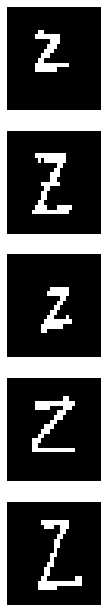

In [ ]:

sample_class = 5

fig = plt.figure(figsize=(n_classes*2, (1+sample_class * 2)))
index_class = 0

for cls in classes:
  ids = np.flatnonzero(Y==cls)
  ids = np.random.choice(ids,sample_class, replace=False)
  i = 0

  for id in ids:
    pltid = i*n_classes + index_class + 1 
    pltsub = plt.subplot(sample_class,n_classes,pltid)
    pltsub = sns.heatmap(np.reshape(X[id], (22,30) ), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False )
    pltsub = plt.axis('off')
    i+= 1

index_class+=1

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=9, train_size=3500, test_size=500)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(X_train_scaled, Y_train)

Y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print("The accuracy is :- ",accuracy)

The accuracy is :-  0.944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


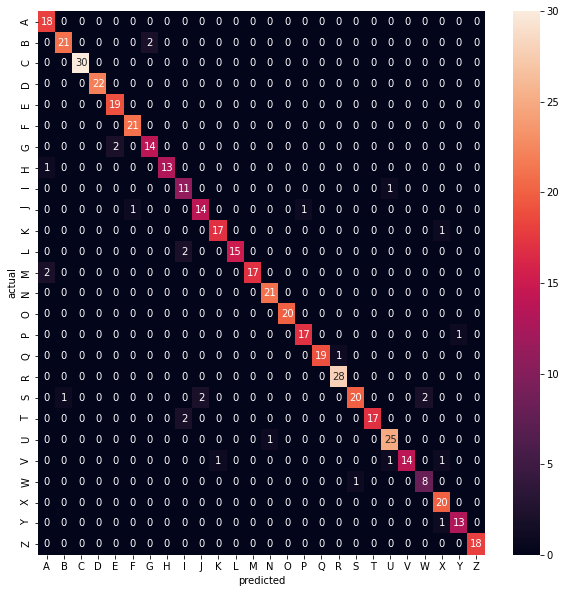

In [ ]:
ccmm = pd.crosstab(Y_test,y_pred, rownames=['actual'], colnames=['predicted'])

pltsub = plt.figure(figsize=(10,10))
pltsub = sns.heatmap(ccmm, annot=True, fmt='d', cbar=True)
